<a href="https://colab.research.google.com/github/Rudancing/New_test/blob/Statistic/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_Phyton_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# загружаем исходный файл
df = pd.read_csv('HR.csv')
# проверяем на пропуски
(df.isna().mean()*100).round(2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64

In [ ]:
# проверяем типы данных
df.info()

In [ ]:
# рассчитываем основные статистики для переменных
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#к основным показателям, рассчитанным выше добавляем моду
mode_satisfaction_level = df['satisfaction_level'].mode()[0]
mode_last_evaluation = df['last_evaluation'].mode()[0]
mode_number_project = df['number_project'].mode()[0]
mode_average_montly_hours = df['average_montly_hours'].mode()[0]
mode_time_spend_company = df['time_spend_company'].mode()[0]
data_mode = {'satisfaction_level': mode_satisfaction_level, 'last_evaluation': mode_last_evaluation,
             'number_project': mode_number_project, 'average_montly_hours': mode_average_montly_hours,
             'time_spend_company': mode_time_spend_company }
df_mode = pd.DataFrame(data_mode, index = ['mode'])
df_mode

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
mode,0.1,0.55,4,135,3


In [ ]:
# строим корреляционную матрицу
round(df.corr(),3)

<ipython-input-5-a1ccff4da87c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr(),3)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
Work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


<ipython-input-37-76a871f6a25e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.corr(),3) , annot = True, cmap = 'magma')


<Axes: >

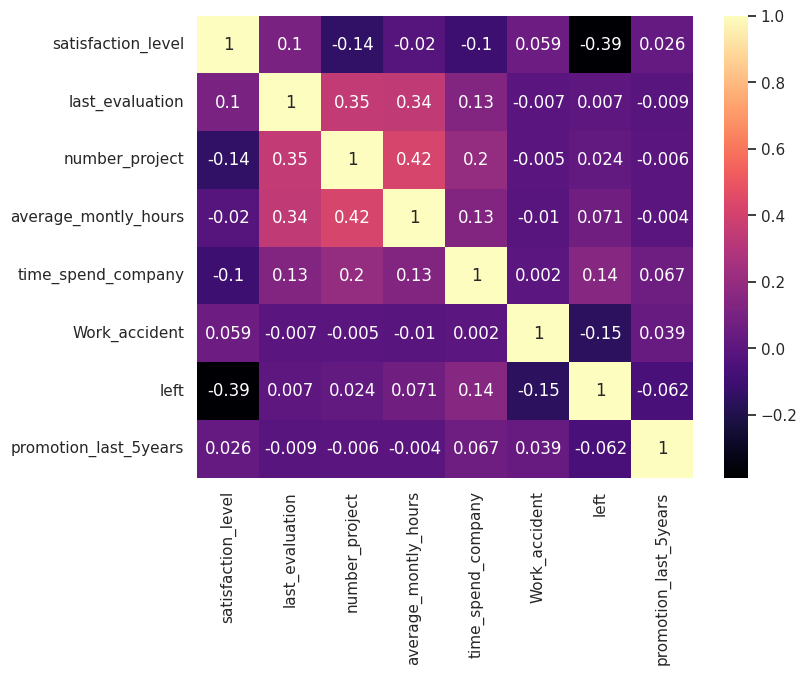

In [ ]:
# визуализируем при помощи тепловой карты
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(round(df.corr(),3) , annot = True, cmap = 'magma')

In [ ]:
# определяем, что
# две наиболее скоррелированные переменные:
# Среднее количество часов на рабочем месте в месяц и Количество проектов, выполненных за время работы (0,42)
# две наименее скоррелированные переменные:
# Происходили ли несчастные случаи на рабочем месте с сотрудником и Стаж работы в компании в годах (0,002)л

In [ ]:
# считаем количество сотрудников по отделам
df_employees_by_dept = df.groupby(['department'])['salary'].count().reset_index()
df_employees_by_dept.rename(columns ={'salary': '№ of employees'}, inplace = True )
df_employees_by_dept

,department,№ of employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


0 1237
1 7316
2 6446


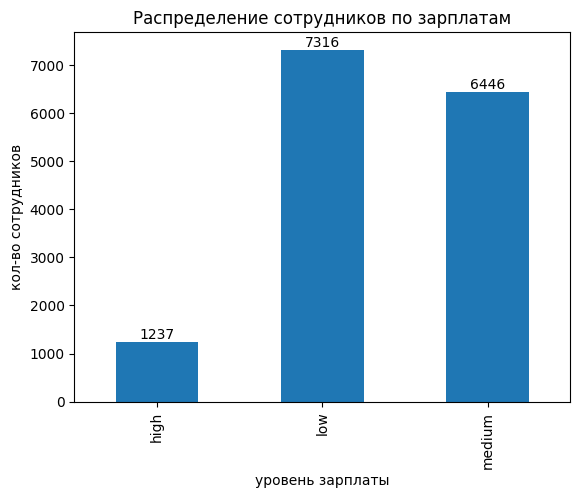

In [ ]:
# визуализируем распределение сотрудников по уровню зп
df_salary_bar = df.groupby(['salary'])['department'].count()
df_salary_bar.plot(kind = 'bar', title = 'Распределение сотрудников по зарплатам', xlabel = 'уровень зарплаты', ylabel = 'кол-во сотрудников')
for i, val in enumerate(df_salary_bar.values):
    plt.text(i, val, int(val), horizontalalignment = 'center', verticalalignment = 'bottom', fontdict = {'size': 10})
    print(i, val)

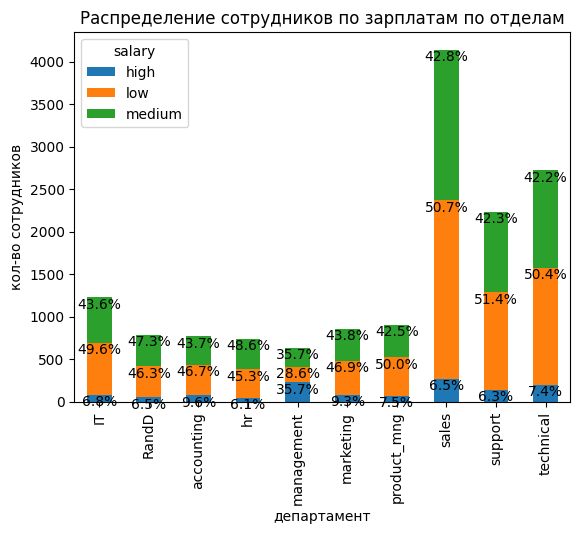

In [ ]:
# Для визуализации распределения сотрудников по уровню зп по департаментам выбрал столбчатую диаграмму с накоплением
df_salary_by_dept_bar = df.groupby(['department','salary'])['left'].count().reset_index()
df_pivot_salary = pd.pivot_table(df_salary_by_dept_bar.reset_index(), index='department', columns='salary', values='left')
df_pivot_salary.plot(kind = 'bar', title = 'Распределение сотрудников по зарплатам по отделам', xlabel = 'департамент', ylabel = 'кол-во сотрудников', stacked = True)
for i, val in enumerate(df_pivot_salary.values):
    pos = 0
    for el in val:
      pos = pos + el
      plt.text(i, pos, '{:.1%}'.format(el/sum(val)), horizontalalignment = 'center', verticalalignment = 'top', fontdict = {'size': 10})

In [ ]:
# Выдвигаем гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
# В этом случае нашей нулевой гипотезой будет
# H0 - нет зависмости размера оклада от времени проведенного на работе
# H1 - зависимость размера оклада от времени проведенного на работе существует

In [ ]:
# Для начала формируем два датасэта для сотрудников и низким окладом и для сотрудников и высоким окладом.
df_low_salary = df[['average_montly_hours', 'salary']][df['salary'] == 'low']
df_high_salary =df[['average_montly_hours', 'salary']][df['salary'] == 'high']
# принимаем уровень значимости а = 0.05
alpha = 0.05

<Axes: >

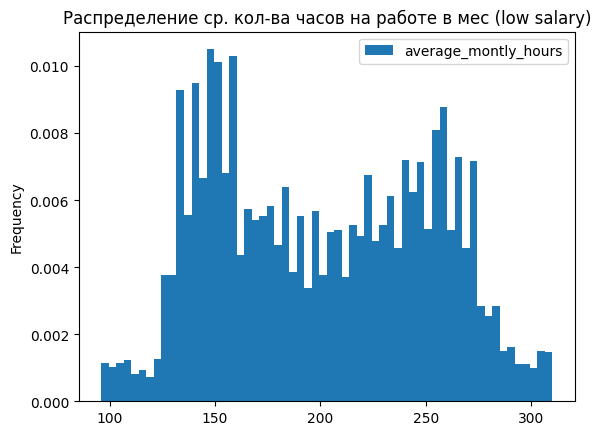

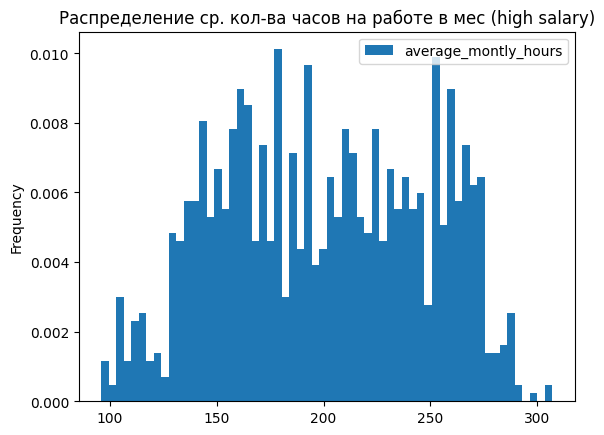

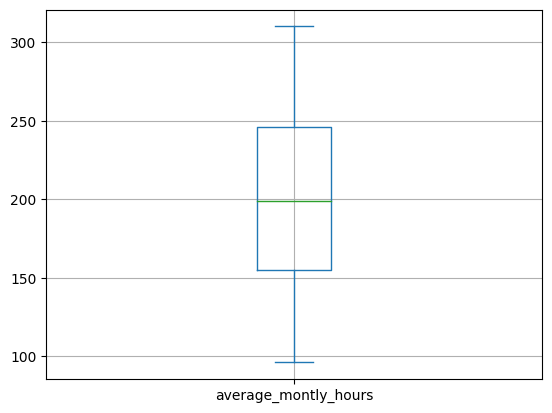

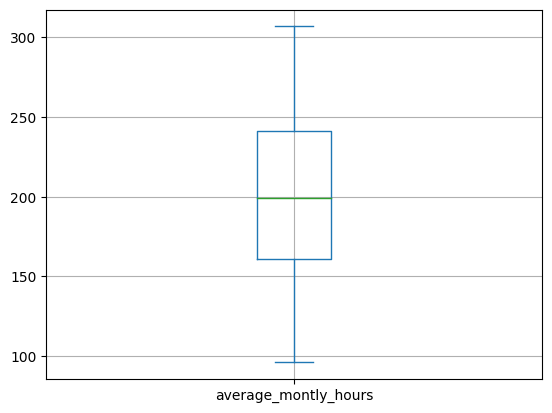

In [ ]:
# Смотрим на распределенеи обеих выборок и выбросы
df_low_salary.plot(kind = 'hist', title = 'Распределение ср. кол-ва часов на работе в мес (low salary)', bins = 60, density = True)
df_high_salary.plot(kind = 'hist', title = 'Распределение ср. кол-ва часов на работе в мес (high salary)', bins = 60, density = True)
df_low_salary.plot(kind = 'box', grid = True)
df_high_salary.plot(kind = 'box', grid = True)

In [ ]:
# распределение в обеих выборках нормальное, выбросы отсутствуют, применяем тест Стьюдента
stat, p = stats.ttest_ind(df_low_salary['average_montly_hours'], df_high_salary['average_montly_hours'])
print('pvalue = ', p)

if (p < alpha):
  print ('p-value меньше нашего уровня значимости - принимаем альтернативную гипотезу H1/')
else:
  print ('p-value больше нашего уровня значимости - нулевую гипотезу H0 не отклоняем.')

pvalue =  0.4661023478267259
p-value больше нашего уровня значимости - нулевую гипотезу H0 не отклоняем.


In [ ]:
# В результате проверки гипотезы, мы не можем утверждать, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким окладом. Гипотеза не подтверждена.

In [ ]:
# Делимм датасет на два: уволившиеся и неуволившиеся сотрудники
df_left = df[df['left'] == 1]
df_stayed = df[df['left'] == 0]
# считаем долю сотрудников с повышением за последние 5 лет
promotion_share_left = df_left['promotion_last_5years'].sum() / df_left['promotion_last_5years'].count()
promotion_share_stayed = df_stayed['promotion_last_5years'].sum() / df_stayed['promotion_last_5years'].count()
# считаем среднюю удовлетворенность и кол-во проектов для обеих выборок
satisfaction_left = df_left['satisfaction_level'].mean()
satisfaction_stayed = df_stayed['satisfaction_level'].mean()
projects_left = df_left['number_project'].mean()
projects_stayed = df_stayed['number_project'].mean()
print('\033[1m''Доля сотрудников с повышением за последние 5 лет составляет:''\033[0m''\nдля уволившихся сотрудников: {:.1%}'.format(promotion_share_stayed), '\nдля оставшихся сотрудников: {:.1%}'.format(promotion_share_left))
print('\033[1m''Средняя удовлетворенность:''\033[0m''\nдля уволившихся сотрудников: {:.1%}'.format(satisfaction_left), '\nдля оставшихся сотрудников: {:.1%}'.format(satisfaction_stayed))
print('\033[1m''Среднее кол-во проектов:''\033[0m''\nдля уволившихся сотрудников:', round(projects_left,0), '\nдля оставшихся сотрудников:', round(projects_stayed,0))

Доля сотрудников с повышением за последние 5 лет составляет:
для уволившихся сотрудников: 2.6% 
для оставшихся сотрудников: 0.5%
Средняя удовлетворенность:
для уволившихся сотрудников: 44.0% 
для оставшихся сотрудников: 66.7%
Среднее кол-во проектов:
для уволившихся сотрудников: 4.0 
для оставшихся сотрудников: 4.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# разделяем выборку на тестовую и обучающую и строим модель регрессии
x = df[['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df['left']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.3)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([-6.67146494e-01,  8.94636378e-02, -3.06965508e-02,  6.63799684e-04,
        3.22562759e-02, -1.53085014e-01, -1.58223059e-01])

In [ ]:
lr.intercept_

0.47953595530617454

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
# посмотрим основные метрики
print(f'R2: {metrics.r2_score(y_test, y_pred)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

R2: 0.18326882703830805
MAE: 0.30656827821115634
MSE: 0.14821416207893298
RMSE: 0.3849859245205375


<Axes: xlabel='left', ylabel='Count'>

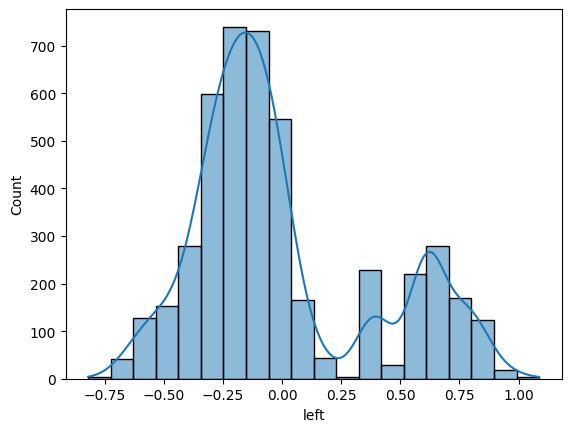

In [ ]:
sns.histplot((y_test - y_pred), kde = True, bins = 20)

In [ ]:
# так как значения y_test содержат только 0 и 1, то попробуем модифицировать полученные значения y_pred, таким образом, чтобы в них также были только 0 и 1.
# а после еще раз рассчитаем метрики
y_pred_mod = [int(round(el)) for el in y_pred]
print(f'R2: {metrics.r2_score(y_test, y_pred_mod)}')
print(f'MAE: {metrics.mean_absolute_error(y_test, y_pred_mod)}')
print(f'MSE: {metrics.mean_squared_error(y_test, y_pred_mod)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_mod))}')

R2: -0.28577866211532776
MAE: 0.23333333333333334
MSE: 0.23333333333333334
RMSE: 0.48304589153964794


<Axes: xlabel='left', ylabel='Count'>

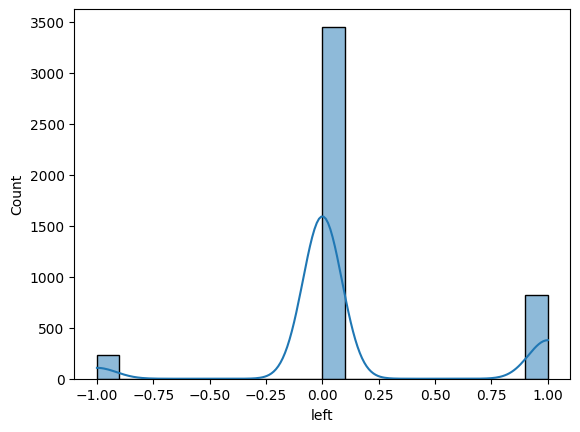

In [ ]:
sns.histplot((y_test - y_pred_mod), kde = True, bins = 20)

In [ ]:
# после модификации качество модели повысилось, но тем не менее
# на основании полученных метрик, в частности коэффициента детерминации можно судить о неудовлетворительном качестве построенной модели.